#Prediction using Supervised ML
##Task 1 @GRIPOctober2021
##Author = Yash Anil Joshi
##Predict the percentage of student based on number of hours.

#Import libraries pandas,numpy and matplotlib


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading and storeing data 

In [ ]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

##Showing 5 columns of data

In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


##Exploreing Data.

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.shape

(25, 2)

##ploting a graph

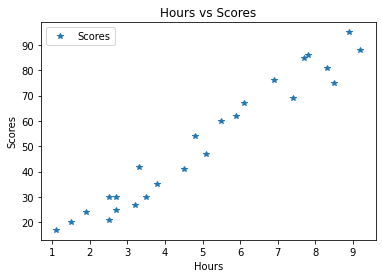

In [ ]:
data.plot(x='Hours',y='Scores',style='*')
plt.title('Hours vs Scores')  
plt.xlabel('Hours')  
plt.ylabel('Scores') 
plt.show()

#Prepareing data for Linear regression.

In [ ]:
a = data.iloc[:,:-1].values
b = data.iloc[:,-1].values

#spliting data in train and test 


In [ ]:
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a, b, 
                            test_size=0.3, random_state=0) 

#importing and applying Linear regression.


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(a_train,b_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#printing the regression intercept

In [ ]:
reg.intercept_


2.3708153823418883

#printing the regression coefficent

In [ ]:
reg.coef_

array([9.78856669])

#ploting the regression line

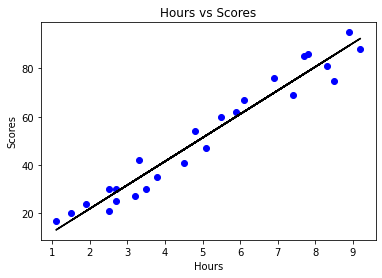

In [ ]:
line = reg.coef_*a+reg.intercept_

plt.scatter(a, b,color='blue')
plt.plot(a, line,color ='black')
plt.title('Hours vs Scores')  
plt.xlabel('Hours')  
plt.ylabel('Scores') 
plt.show()

In [ ]:
b_pred = reg.predict(a_test)

In [ ]:
df = pd.DataFrame({'Actual data': b_test, 'Predicted data': b_pred})
df

,Actual data,Predicted data
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


#visualizing predicted and actual data.

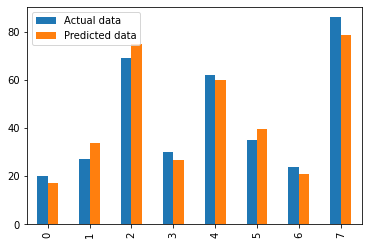

In [ ]:
df.plot(kind='bar')

#calculating predicted score for 9.25 hours


In [ ]:
hour = 9.25
test_new = np.array([hour])
test_new= test_new.reshape(-1,1)
own_pred = reg.predict(test_new)
print("No of Hours = ", hour)
print("Predicted Score = ", own_pred[0])

No of Hours =  9.25
Predicted Score =  92.91505723477056


#Evaluating model.

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics  


In [ ]:
print('Mean squared error = %.2f' % mean_squared_error(b,b_pred))

Mean squared error = 28.89


In [ ]:
print('Mean Absolute Error:',metrics.mean_absolute_error(b, b_pred)) 

Mean Absolute Error: 4.982315081106276


In [ ]:
print("r2_score: %.2f " % r2_score(b,b_pred))

r2_score: 0.95 
